# Song genre classifier, with spotify data

$Equipo: Daniel Navarro Hernandez, Iñaki Sebastián Orozco García$

In [91]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
%matplotlib inline

In [92]:
alternative = pd.read_csv("./data/alternative_music_data.csv")
blues = pd.read_csv("./data/blues_music_data.csv")
hiphop = pd.read_csv("./data/hiphop_music_data.csv")
indie_alt = pd.read_csv("./data/indie_alt_music_data.csv")
metal = pd.read_csv("./data/metal_music_data.csv")
pop = pd.read_csv("./data/pop_music_data.csv")
rock = pd.read_csv("./data/rock_music_data.csv")

### We check the shape of the diferent data frames

In [93]:
alternative.shape

(2160, 22)

In [94]:
blues.shape

(2050, 22)

In [95]:
hiphop.shape

(2581, 22)

In [96]:
indie_alt.shape

(4338, 22)

In [97]:
metal.shape

(3045, 22)

In [98]:
pop.shape

(3831, 22)

In [99]:
rock.shape

(8747, 22)

### Agregamos el género a los data frames:

1. alternative
2. blues
3. hiphop
4. indie alt
5. metal
6. pop
7. rock

In [100]:
labels = []
for x in range(alternative.shape[0]):
    labels.append(1)
alternative["labels"] = labels

labels = []
for x in range(blues.shape[0]):
    labels.append(2)
blues["labels"] = labels

labels = []
for x in range(hiphop.shape[0]):
    labels.append(3)
hiphop["labels"] = labels

labels = []
for x in range(indie_alt.shape[0]):
    labels.append(4)
indie_alt["labels"] = labels

labels = []
for x in range(metal.shape[0]):
    labels.append(5)
metal["labels"] = labels

labels = []
for x in range(pop.shape[0]):
    labels.append(6)
pop["labels"] = labels

labels = []
for x in range(rock.shape[0]):
    labels.append(7)
rock["labels"] = labels

### Juntamos los data frames 

In [101]:
data = pd.concat([alternative, blues, hiphop, indie_alt, metal, pop, rock])
dataNoFilter = data
data1 = data
data2 = data
data.shape

(26752, 23)

### Filtramos la información necesaria para entrenar los modelos:

#### Eliminamos la información no numérica que no aporta nada.

In [102]:
data = data.drop(["Artist Name", "Track Name", "Genres", "Playlist", "id", "uri", "track_href", "analysis_url"], axis=1)

In [103]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26752 entries, 0 to 8746
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Popularity        26752 non-null  int64  
 1   danceability      26752 non-null  float64
 2   energy            26752 non-null  float64
 3   key               26752 non-null  int64  
 4   loudness          26752 non-null  float64
 5   mode              26752 non-null  int64  
 6   speechiness       26752 non-null  float64
 7   acousticness      26752 non-null  float64
 8   instrumentalness  26752 non-null  float64
 9   liveness          26752 non-null  float64
 10  valence           26752 non-null  float64
 11  tempo             26752 non-null  float64
 12  duration_ms       26752 non-null  int64  
 13  time_signature    26752 non-null  int64  
 14  labels            26752 non-null  int64  
dtypes: float64(9), int64(6)
memory usage: 3.3 MB


In [104]:
import seaborn as sns

### Podemos ver que la información que estamos usando no parece tener mucha relación entre sí ya que las gráficas no tienen una tendencia visible y en la mayoría de los casos la gráfica muestra que la relación entre los campos es inexistente.

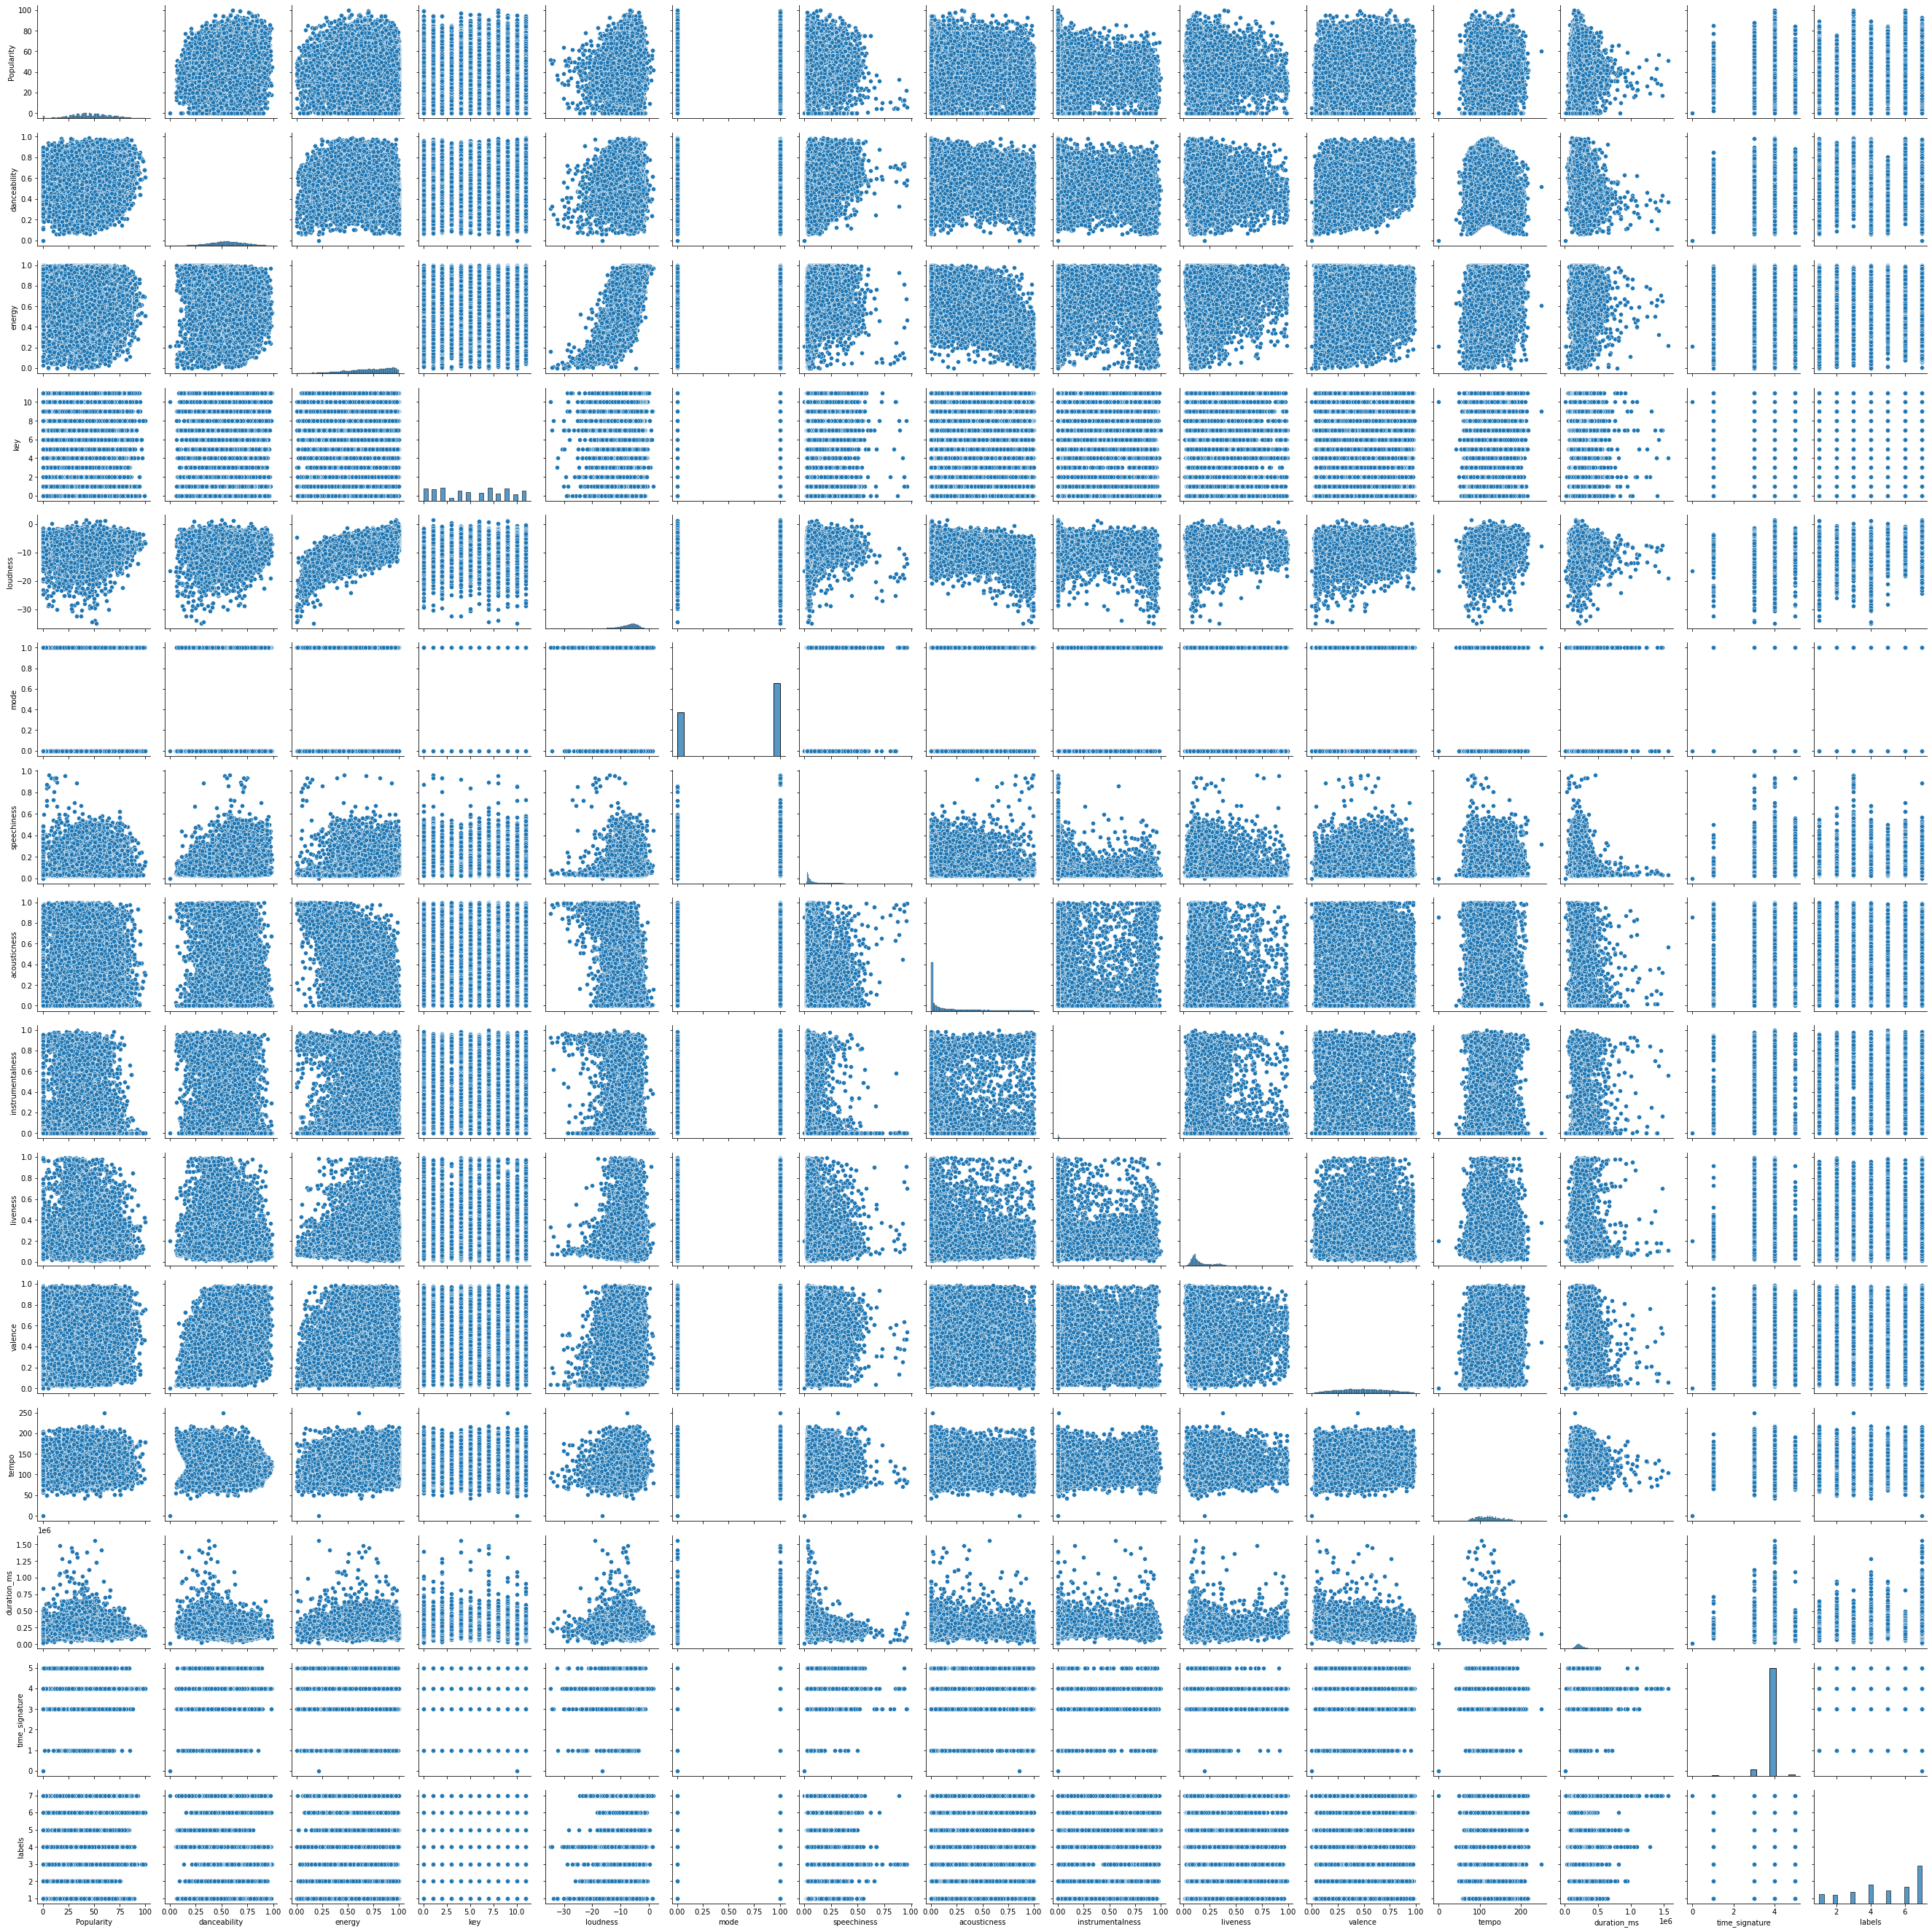

In [105]:
sns.pairplot(data)


### Iniciamos la separación de los datos para el entrenamiento

In [106]:
ydata = data.labels
Xdata = data.drop(["labels"], axis=1)

In [107]:
X_train, X_test, y_train, y_test = train_test_split(Xdata, ydata, test_size=0.3, random_state = 1)

## Creación y entrenamiento de modelos

In [108]:
from sklearn import tree

In [109]:
tree_model1 = tree.DecisionTreeClassifier().fit(X_train, y_train)

### Tree: 

In [110]:
tree_model1.score(X_test, y_test)

0.4380762521804137

In [111]:
from sklearn.ensemble import RandomForestClassifier

In [112]:
RF_model1 = RandomForestClassifier().fit(X_train, y_train)

### Random Forest: 

In [113]:
RF_model1.score(X_test, y_test)

0.544978818838774

In [114]:
from sklearn import svm

In [115]:
SVM_model1 = svm.SVC().fit(X_train, y_train)

### SVM: 

In [116]:
SVM_model1.score(X_test, y_test)

0.32257662596561176

In [117]:
from sklearn.neural_network import MLPClassifier

In [118]:
MLP_model1 = MLPClassifier().fit(X_train, y_train)

### MLP: 

In [119]:
MLP_model1.score(X_test, y_test)

0.1171193620732619

## Tuvimos resultados muy bajos en los modelos, nuestros datos no tienen mucha relación entre si
Lo primero que haremos para intentar mejorar la efectividad de los modelos es eliminar los campos que parecen tener menos importancia y que al final le agregan ruido al modelo.

Eliminamos datos que creemos que solo aportan ruido para ver si podemos mejorar la efectividad del modelo (key, mode, time signature y duration ms).

In [120]:
data1 = data1.drop(["Artist Name", "Track Name", "Genres", "Playlist", "id", "uri", "track_href", "analysis_url", "key", "mode", "time_signature", "duration_ms"], axis=1)


### Iniciamos la separación de los datos para el entrenamiento

In [121]:
ydata = data1.labels
Xdata = data1.drop(["labels"], axis=1)

In [122]:
X_train, X_test, y_train, y_test = train_test_split(Xdata, ydata, test_size=0.3, random_state = 1)

## Creación y entrenamiento de modelos

In [123]:
tree_model1 = tree.DecisionTreeClassifier().fit(X_train, y_train)

### Tree: 

In [124]:
tree_model1.score(X_test, y_test)

0.4342138051333167

In [125]:
RF_model1 = RandomForestClassifier().fit(X_train, y_train)

### Random Forest: 

In [126]:
RF_model1.score(X_test, y_test)

0.5384998754049339

In [127]:
SVM_model1 = svm.SVC().fit(X_train, y_train)

### SVM: 

In [128]:
SVM_model1.score(X_test, y_test)

0.32257662596561176

In [129]:
MLP_model1 = MLPClassifier().fit(X_train, y_train)

### MLP: 

In [130]:
MLP_model1.score(X_test, y_test)

0.4646150012459507

Al parecer eliminar esos predictores solo sirvió para el modelo MLP y aún así ni siquiera alcanza un rendimiento que podamos considerar aceptable, todos los demás modelos si utilizaban esos predictores en el aprendizaje y perdieron 1% de efectividad si los retiramos.

### Making the data sets about the same length
Intentamos convertir los data sets al mismo tamaño para poder ver si con la misma cantidad de datos por género los modelos tienen un mejor desempeño:

In [131]:
hiphop = hiphop.iloc[0:2499]
indie_alt = indie_alt.iloc[0:2499]
metal = metal.iloc[0:2499]
pop = pop.iloc[0:2499]
rock = rock.iloc[0:2499]

### Agregamos el género a los data frames:

1. alternative
2. blues
3. hiphop
4. indie alt
5. metal
6. pop
7. rock

In [132]:
labels = []
for x in range(alternative.shape[0]):
    labels.append(1)
alternative["labels"] = labels

labels = []
for x in range(blues.shape[0]):
    labels.append(2)
blues["labels"] = labels

labels = []
for x in range(hiphop.shape[0]):
    labels.append(3)
hiphop["labels"] = labels

labels = []
for x in range(indie_alt.shape[0]):
    labels.append(4)
indie_alt["labels"] = labels

labels = []
for x in range(metal.shape[0]):
    labels.append(5)
metal["labels"] = labels

labels = []
for x in range(pop.shape[0]):
    labels.append(6)
pop["labels"] = labels

labels = []
for x in range(rock.shape[0]):
    labels.append(7)
rock["labels"] = labels

### Juntamos los data frames 

In [133]:
data = pd.concat([alternative, blues, hiphop, indie_alt, metal, pop, rock])
dataNoFilter = data
data1 = data
data2 = data
data.shape

(16705, 23)

### Filtramos la información necesaria para entrenar los modelos:

#### Eliminamos la información no numérica que no aporta nada.

In [134]:
data = data.drop(["Artist Name", "Track Name", "Genres", "Playlist", "id", "uri", "track_href", "analysis_url"], axis=1)

In [135]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16705 entries, 0 to 2498
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Popularity        16705 non-null  int64  
 1   danceability      16705 non-null  float64
 2   energy            16705 non-null  float64
 3   key               16705 non-null  int64  
 4   loudness          16705 non-null  float64
 5   mode              16705 non-null  int64  
 6   speechiness       16705 non-null  float64
 7   acousticness      16705 non-null  float64
 8   instrumentalness  16705 non-null  float64
 9   liveness          16705 non-null  float64
 10  valence           16705 non-null  float64
 11  tempo             16705 non-null  float64
 12  duration_ms       16705 non-null  int64  
 13  time_signature    16705 non-null  int64  
 14  labels            16705 non-null  int64  
dtypes: float64(9), int64(6)
memory usage: 2.0 MB


In [136]:
import seaborn as sns

### Podemos ver que la información que estamos usando no parece tener mucha relación entre sí ya que las gráficas no tienen una tendencia visible y en la mayoría de los casos la gráfica muestra que la relación entre los campos es inexistente.

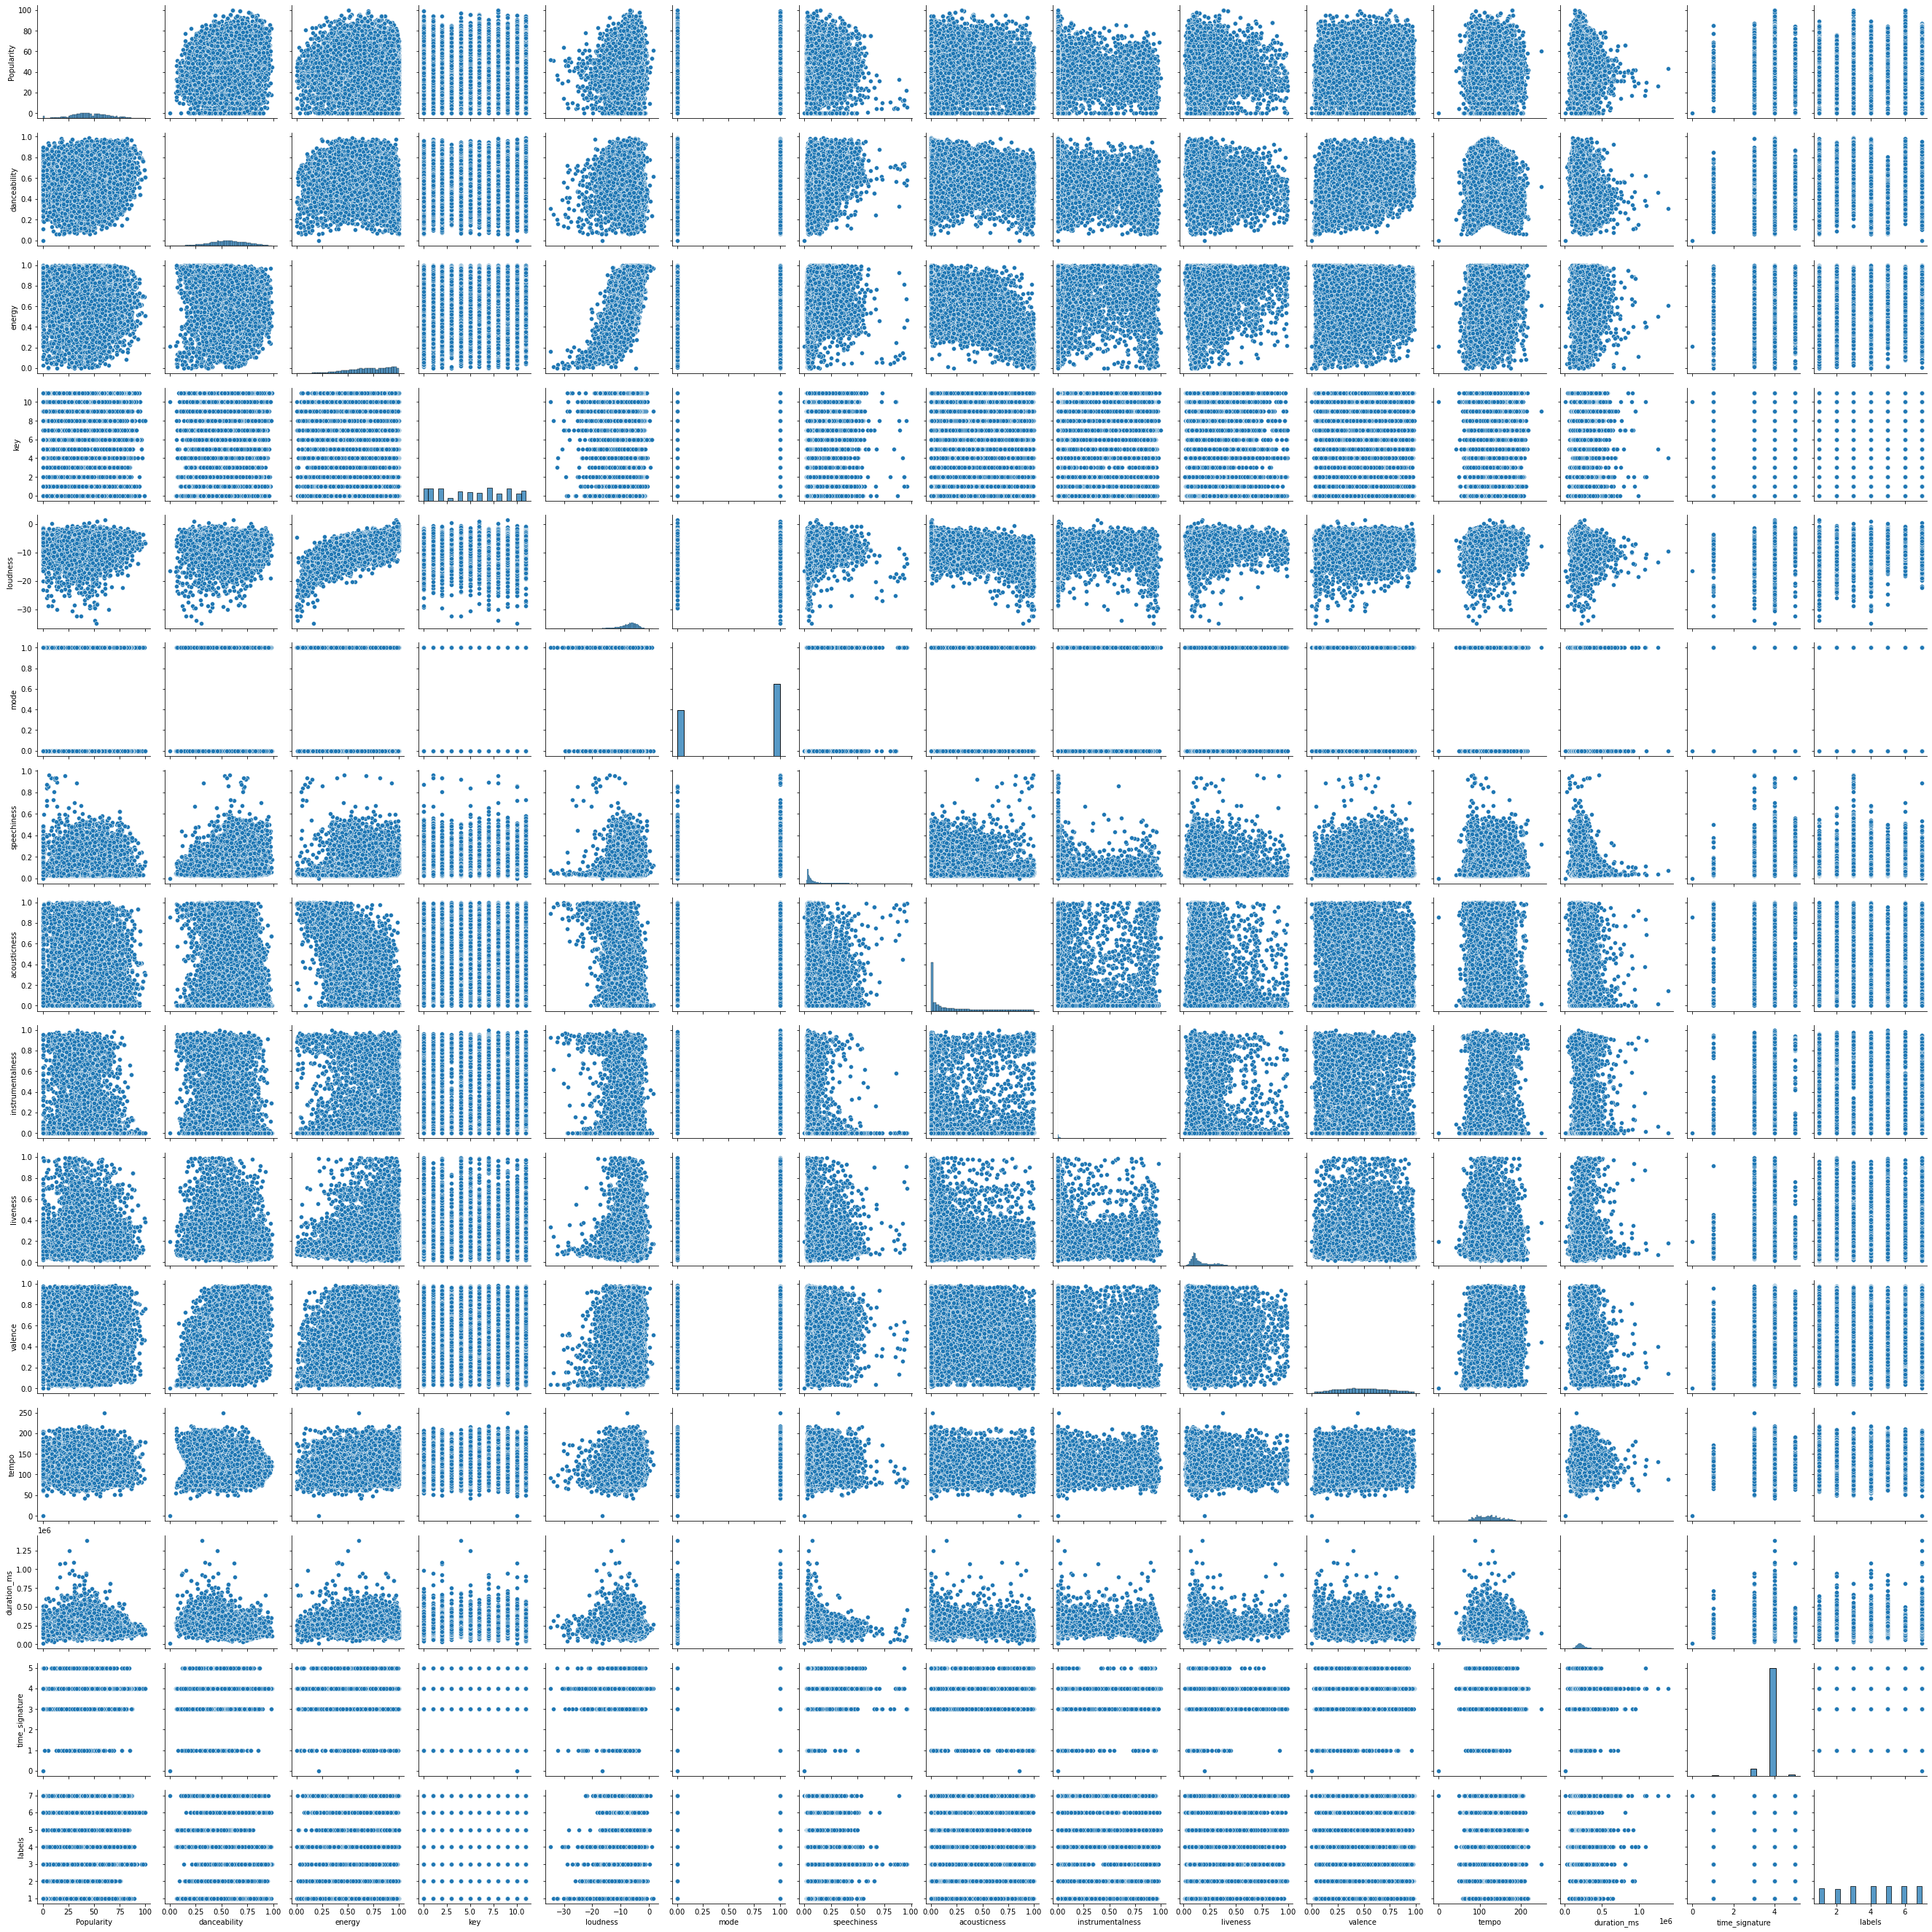

In [137]:
sns.pairplot(data)


### Iniciamos la separación de los datos para el entrenamiento

In [138]:
ydata = data.labels
Xdata = data.drop(["labels"], axis=1)

In [139]:
X_train, X_test, y_train, y_test = train_test_split(Xdata, ydata, test_size=0.3, random_state = 1)

## Creación y entrenamiento de modelos

In [140]:
from sklearn import tree

In [141]:
tree_model1 = tree.DecisionTreeClassifier().fit(X_train, y_train)

### Tree: 

In [142]:
tree_model1.score(X_test, y_test)

0.42118914604948127

In [143]:
from sklearn.ensemble import RandomForestClassifier

In [144]:
RF_model1 = RandomForestClassifier().fit(X_train, y_train)

### Random Forest: 

In [145]:
RF_model1.score(X_test, y_test)

0.5317238627294493

In [146]:
from sklearn import svm

In [147]:
SVM_model1 = svm.SVC().fit(X_train, y_train)

### SVM: 

In [148]:
SVM_model1.score(X_test, y_test)

0.21069433359936154

In [149]:
from sklearn.neural_network import MLPClassifier

In [150]:
MLP_model1 = MLPClassifier().fit(X_train, y_train)

### MLP: 

In [151]:
MLP_model1.score(X_test, y_test)

0.1512370311252993